This notebook assumes you are using sims_maf version >= 1.1, and have 'setup sims_maf' in your shell. 

Demo of using a complex metric with reduce functions, the 'completeness' metric.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils

Connect to opsim database as usual, and get information on the proposals and the requested number of visits, in order to configure the 'completeness' metric.

In [2]:
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')

In [3]:
propinfo, proptags = opsdb.fetchPropInfo()
reqvisits = opsdb.fetchRequestedNvisits(proptags['WFD'])
print reqvisits

{'g': 105, 'i': 240, 'r': 240, 'u': 75, 'y': 210, 'z': 210}


/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3738: SAWarning: Textual SQL expression '' should be explicitly declared as text('') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3738: SAWarning: Textual SQL expression "paramName like 'ScienceTy..." should be explicitly declared as text("paramName like 'ScienceTy...") (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3738: SAWarning: Textual SQL expression '((propId = 364))' should be explicitly declared as text('((propId = 364))') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})


Set up metric and slicer, and generate a sql constraint for the WFD proposal using a MAF utility. Set the limits we want for the x/color range in the plotDict.

In [4]:
completeness_metric = metrics.CompletenessMetric(u=reqvisits['u'], g=reqvisits['g'], r=reqvisits['r'], 
                                          i=reqvisits['i'], z=reqvisits['z'], y=reqvisits['y'])
slicer = slicers.OpsimFieldSlicer()
sqlconstraint = utils.createSQLWhere('WFD', proptags)
summaryMetric = metrics.TableFractionMetric()
plotDict = {'xMin':0, 'xMax':1.2, 'colorMin':0, 'colorMax':1.2, 'binsize':0.025}

Instantiate the metric bundle, and turn it into a dictionary, then set up the metricbundlegroup.

In [5]:
completeness = metricBundles.MetricBundle(metric=completeness_metric, slicer=slicer, 
                                          sqlconstraint=sqlconstraint, runName='enigma_1189', 
                                          summaryMetrics=summaryMetric, plotDict=plotDict)

In [6]:
bdict = {'completeness':completeness}

In [7]:
outDir = 'completeness_test'
resultsDb = db.ResultsDb(outDir=outDir)
bg = metricBundles.MetricBundleGroup(bdict, opsdb, outDir=outDir, resultsDb=resultsDb)

Run it! This also runs all 'reduce' methods (via MetricBundleGroup.reduceAll()) and 'summary metrics' (via MetricBundleGroup.summaryAll()). 

In [8]:
bg.runAll()

Querying database with constraint propID = 364
Found 2109899 visits
Running:  ['completeness']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3738: SAWarning: Textual SQL expression 'propID = 364' should be explicitly declared as text('propID = 364') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})


Plotting.
Plotting complete.


Cannot plot object metric values with this plotter.
Cannot plot object metric values with this plotter.


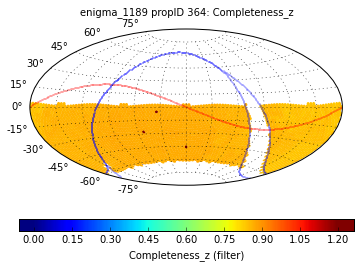

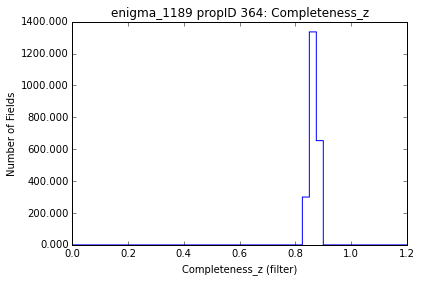

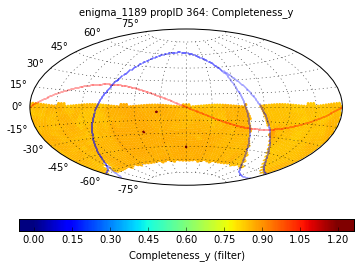

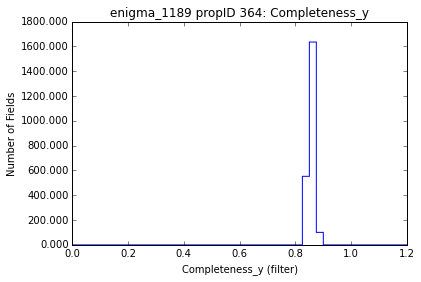

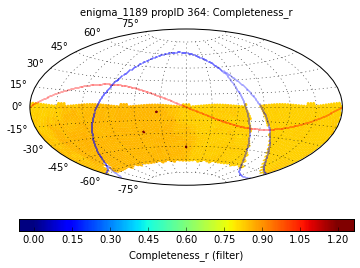

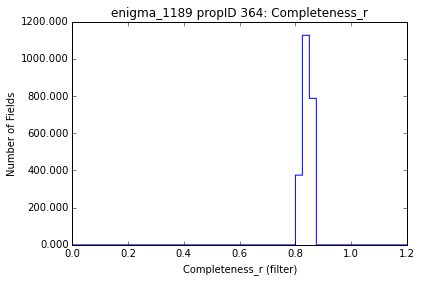

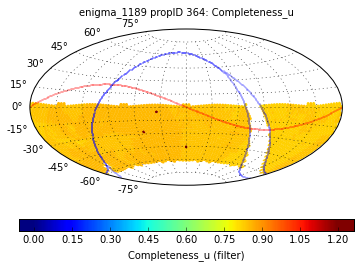

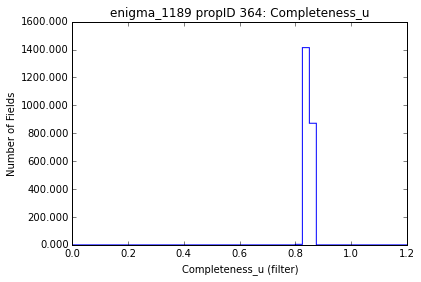

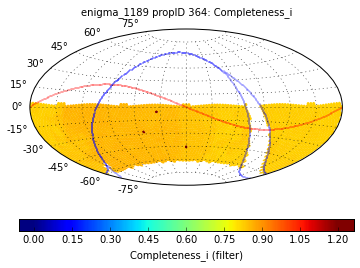

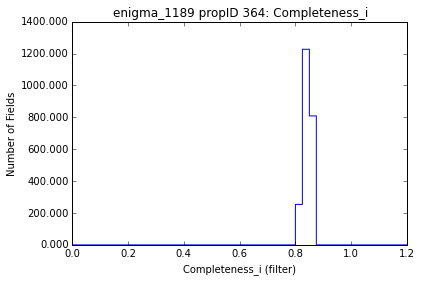

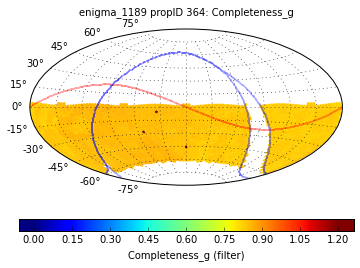

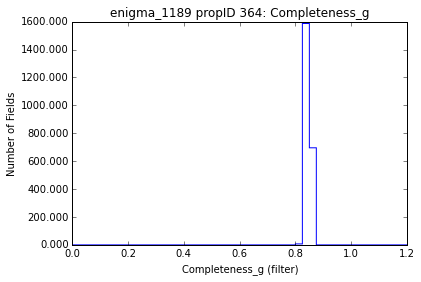

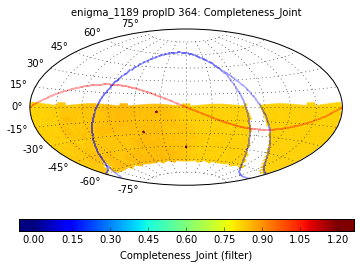

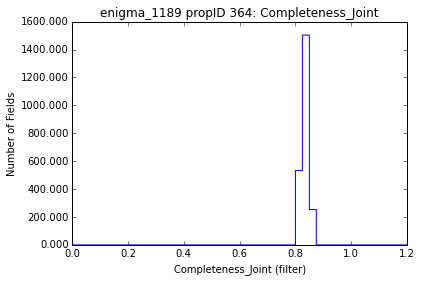

In [9]:
bg.plotAll(closefigs=False)

In [10]:
for b in bdict.itervalues():
    print b.metric.name, b.summaryValues

Completeness_z {'TableFraction': array([('0 == P', 0.0), ('0 < P < 0.1', 0.0), ('0.1 <= P < 0.2', 0.0),
       ('0.2 <= P < 0.3', 0.0), ('0.3 <= P < 0.4', 0.0),
       ('0.4 <= P < 0.5', 0.0), ('0.5 <= P < 0.6', 0.0),
       ('0.6 <= P < 0.7', 0.0), ('0.7 <= P < 0.8', 0.0),
       ('0.8 <= P < 0.9', 2290.0), ('0.9 <= P < 1', 0.0), ('1 == P', 0.0),
       ('1 < P', 3.0)], 
      dtype=[('name', 'S20'), ('value', '<f8')])}
Completeness_y {'TableFraction': array([('0 == P', 0.0), ('0 < P < 0.1', 0.0), ('0.1 <= P < 0.2', 0.0),
       ('0.2 <= P < 0.3', 0.0), ('0.3 <= P < 0.4', 0.0),
       ('0.4 <= P < 0.5', 0.0), ('0.5 <= P < 0.6', 0.0),
       ('0.6 <= P < 0.7', 0.0), ('0.7 <= P < 0.8', 0.0),
       ('0.8 <= P < 0.9', 2290.0), ('0.9 <= P < 1', 0.0), ('1 == P', 0.0),
       ('1 < P', 3.0)], 
      dtype=[('name', 'S20'), ('value', '<f8')])}
Completeness {}
Completeness_r {'TableFraction': array([('0 == P', 0.0), ('0 < P < 0.1', 0.0), ('0.1 <= P < 0.2', 0.0),
       ('0.2 <= P < 0.3', 0.0)